In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [1]:
#obtenemos datasets de prueba, asi que no es necsario memeorizar este trozo de codigo :v
from sklearn.datasets import make_blobs



In [3]:
X,y=make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.6)

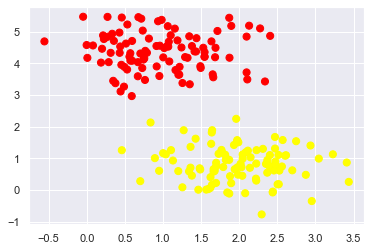

In [4]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

* Veremos la aplicacion de este modelo para separar este conjunto de datos

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=600, linewidth=2, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [6]:
from sklearn.svm import SVC

In [7]:
model =SVC(kernel='linear',C=1e10)

In [8]:
model.fit(X,y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

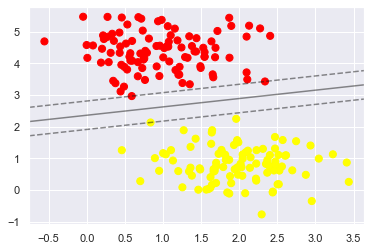

In [9]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)


In [10]:
model.support_vectors_

array([[0.59009904, 2.96974544],
       [2.33812285, 3.43116792],
       [0.83685684, 2.13635938]])

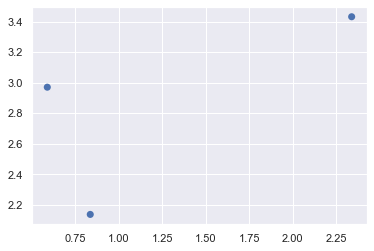

In [11]:
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],
            s=50,lw=1,edgecolors='none'
           )

In [12]:
color={0:'Amarillo',1:'Rojo'}

In [13]:
ytest=model.predict([[2,-2]])
color[ytest[0]]

'Rojo'

In [14]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)


C:\Users\avira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


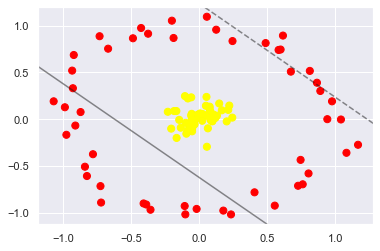

In [15]:

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

#### Para datos suerpuestos


In [16]:
X,y=make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=1.3)

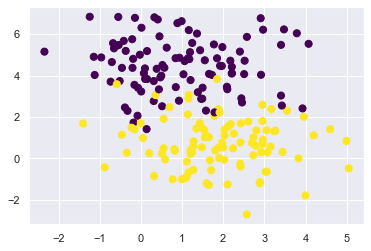

In [17]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='viridis')

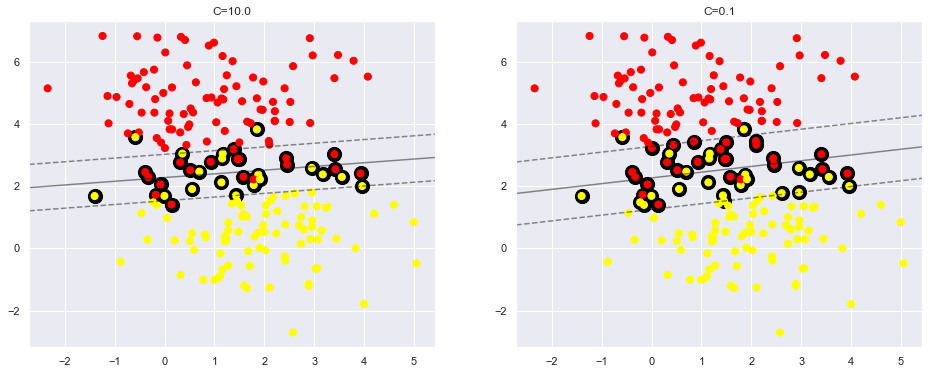

In [18]:
fig,ax=plt.subplots(1,2,figsize=(16,6))

for axis,C in zip(ax,[10,.1]):
    model=SVC(kernel='linear',C=C).fit(X,y)
    axis.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],color='black',s=200,lw=1,edgecolors=None)
    axis.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    plot_svc_decision_function(model,axis)
    axis.set(title='C={0:.1f}'.format(C))

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
model=SVC(kernel='linear')
grid=GridSearchCV(estimator=model,
                 param_grid=dict(
                     kernel=['linear','rbf'],
                     C=np.arange(1,10)
                 ),
                 n_jobs=4,
                 cv=7)

In [21]:
grid.fit(X,y)

GridSearchCV(cv=7, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [23]:
grid.best_estimator_.support_vectors_

array([[-1.77851393e-01,  1.72875192e+00],
       [ 1.46562327e+00,  2.87456630e+00],
       [ 1.58163125e+00,  2.30667054e+00],
       [ 9.25202415e-01,  2.78526578e+00],
       [ 3.12223400e-01,  2.76896549e+00],
       [ 5.16077994e-01,  2.51635065e+00],
       [-8.08200881e-02,  2.05961994e+00],
       [-2.34261668e+00,  5.15349150e+00],
       [-1.24188117e+00,  6.83979534e+00],
       [-3.24009873e-01,  2.29558490e+00],
       [ 2.45749097e+00,  2.69851376e+00],
       [ 1.38325809e+00,  3.19346287e+00],
       [ 3.28827893e-01,  6.81217900e+00],
       [ 2.09014987e+00,  3.45745406e+00],
       [ 1.49107881e+00,  2.88280737e+00],
       [ 8.08880988e-03,  3.22941723e+00],
       [ 3.40409547e+00,  3.03332608e+00],
       [ 1.78907096e+00,  2.22111238e+00],
       [ 2.91099793e+00,  6.76844326e+00],
       [ 3.42436598e+00,  2.55170055e+00],
       [ 1.39566155e-01,  1.41336323e+00],
       [-3.86848776e-01,  2.45776401e+00],
       [ 2.10003714e+00,  3.33897280e+00],
       [ 2.

In [35]:
%config IPcompleter.greedy=True

In [36]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;sns.set();


In [37]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

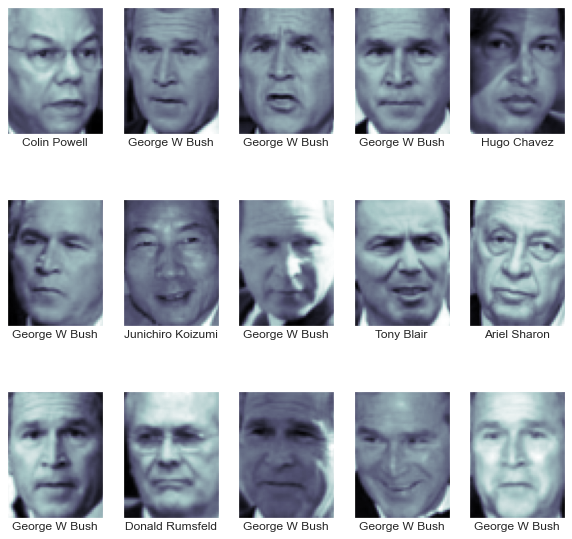

In [38]:
fig,ax=plt.subplots(3,5,figsize=(10,10))
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])


In [39]:
faces.target[:10]

array([1, 3, 3, 3, 5, 3, 6, 3, 7, 0], dtype=int64)

In [40]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [41]:
from sklearn.pipeline import make_pipeline

In [42]:
svc=SVC(kernel='rbf',class_weight='balanced')
pca=PCA(n_components=150,whiten=True,random_state=0)

In [55]:
model=make_pipeline(pca,svc)

In [63]:
param_grid={
    "svc__gamma":[0.0001,0.005,0.001,0.1],
    "svc__C":[10**n for n in range(10)]
}

In [64]:
faces.data.shape,faces.images.shape

((1348, 2914), (1348, 62, 47))

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(faces.data,faces.target, random_state=0,test_size=0.2)

In [67]:
from sklearn.model_selection import GridSearchCV

In [70]:
grid=GridSearchCV(estimator=model, 
                  param_grid=param_grid,
                  n_jobs=4,cv=3)

In [71]:
%timeit grid.fit(Xtest,Ytest)
grid.best_params_

41.9 s ± 11.5 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


{'svc__C': 1000, 'svc__gamma': 0.0001}

In [73]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=0, svd_solver='auto', tol=0.0, whiten=True)),
                ('svc',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.0001,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [74]:
model=grid.best_estimator_

In [77]:
yfit=model.predict(Xtest)

In [81]:
faces.target_names[faces.target[1]]

'George W Bush'

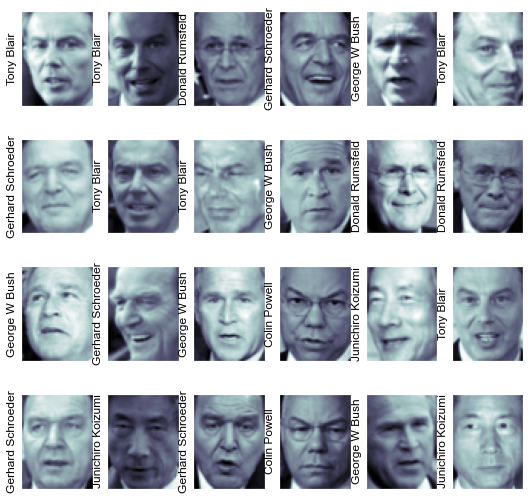

In [88]:
fig,axes=plt.subplots(4,6,figsize=(9,9))
for i, axi in enumerate(axes.flat):
    axi.imshow(Xtest[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(ylabel=faces.target_names[yfit[i]],
            color='black' if yfit[i]==Ytest[i] else 'red')

In [92]:
from sklearn.metrics import classification_report,accuracy_score

In [93]:
print(classification_report(Ytest,yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      1.00      1.00        13
     Colin Powell       1.00      1.00      1.00        46
  Donald Rumsfeld       1.00      1.00      1.00        28
    George W Bush       1.00      1.00      1.00        99
Gerhard Schroeder       1.00      1.00      1.00        23
      Hugo Chavez       1.00      1.00      1.00        16
Junichiro Koizumi       1.00      1.00      1.00        14
       Tony Blair       1.00      1.00      1.00        31

         accuracy                           1.00       270
        macro avg       1.00      1.00      1.00       270
     weighted avg       1.00      1.00      1.00       270



In [94]:
accuracy_score(Ytest,yfit)

1.0

In [100]:
(yfit==Ytest).all()

True

In [133]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
sns.set()

In [131]:
mat=confusion_matrix(Ytest,yfit)

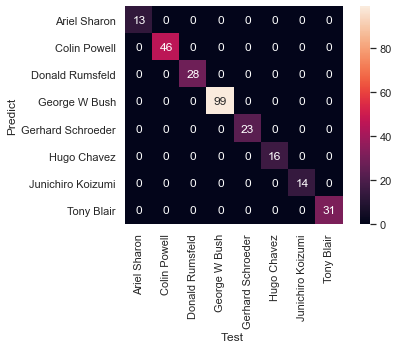

In [145]:
sns.heatmap(mat.T,square=True,annot=True,fmt='d',xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel('Test ')
plt.ylabel('Predict');

In [146]:
mat


array([[13,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 28,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 99,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 23,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31]], dtype=int64)